In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import glob

In [42]:
# Script to combine all signals into one



DATA_PATH = "C:\\Users\\UserPC\\Downloads\\DS\\Stress_dataset"
SAVE_PATH = "C:\\Users\\UserPC\\Downloads\\DS\\processed_data2"
os.mkdir(SAVE_PATH)

final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime'],
}

names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'BVP.csv':['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'],
    'TEMP.csv': ['TEMP'],
}

desired_signals = ['ACC.csv', 'EDA.csv', 'HR.csv', 'TEMP.csv']
desired_signals = ['ACC.csv', 'EDA.csv', 'HR.csv','TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
temp = pd.DataFrame(columns=final_columns['TEMP'])

def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

for file in os.listdir(DATA_PATH):
    print(f'Processing {file}')
    for sub_file in os.listdir(os.path.join(DATA_PATH, file)):
        if not sub_file.endswith(".zip"):
            for signal in os.listdir(os.path.join(DATA_PATH, file, sub_file)):
                if signal in desired_signals:
                    df = pd.read_csv(os.path.join(DATA_PATH, file, sub_file, signal), names=names[signal], header=None)
                    if not df.empty:
                        if signal == 'ACC.csv':
                            acc = pd.concat([acc, process_df(df, file)])   
                       
                        if signal == 'EDA.csv':
                            eda = pd.concat([eda, process_df(df, file)])
                        if signal == 'HR.csv':
                            hr = pd.concat([hr, process_df(df, file)])
                        if signal == 'TEMP.csv':
                            temp = pd.concat([temp, process_df(df, file)])

print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)
print('done')

Processing 15
Processing 5C
Processing 6B
Processing 6D
Processing 7A
Processing 7E
Processing 83
Processing 8B
Processing 94
Processing BG
Processing CE
Processing DF
Processing E4
Processing EG
Processing F5
Saving Data ...
done


In [5]:
# read and concate the acc combined file
df = pd.concat([pd.read_csv(filename)
        for filename in glob.glob(r'C:\Users\kdr25\Downloads\DS\processed_data2/combined_acc.csv')])

C:\Users\kdr25\AppData\Local\Temp\ipykernel_17104\3006958573.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(filename)


In [7]:
# read and concate the hrr combined file
df1 = pd.concat([pd.read_csv(filename)
        for filename in glob.glob(r'C:\Users\kdr25\Downloads\DS\processed_data2/combined_hr.csv')])

C:\Users\kdr25\AppData\Local\Temp\ipykernel_17104\2735264294.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.concat([pd.read_csv(filename)


In [8]:
# read and concate the eda combined file
df2= pd.concat([pd.read_csv(filename)
        for filename in glob.glob(r'C:\Users\kdr25\Downloads\DS\processed_data2/combined_eda.csv')])

C:\Users\kdr25\AppData\Local\Temp\ipykernel_17104\786009711.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.concat([pd.read_csv(filename)


In [9]:
# read and concate the temparatue combined file
df3= pd.concat([pd.read_csv(filename)
        for filename in glob.glob(r'C:\Users\kdr25\Downloads\DS\processed_data2/combined_temp.csv')])

C:\Users\kdr25\AppData\Local\Temp\ipykernel_17104\739769138.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3= pd.concat([pd.read_csv(filename)


In [10]:
# here I take the row from acc dataset
df=df.iloc[:1048576,]
# df=np.array(df)
df=np.array(df)

In [11]:
df.shape

(1048576, 5)

In [12]:
# here I take the  row   from hr dataset
hrr=df1.iloc[:1048576,]


In [13]:
hrr.shape

(1048576, 3)

In [14]:
# Take all row and first column from hr dataset
a=hrr.iloc[:, 1]
a=np.array(a)

In [15]:
# add/merge hr data to acc data at column 4
df=np.insert(df,4,a,axis=1)

In [16]:
df

array([[15, -57.0, 7.0, -31.0, 83.0, 1594140175.0],
       [15, -57.0, 7.0, -30.0, 83.0, 1594140175.03125],
       [15, -57.0, 7.0, -30.0, 83.67, 1594140175.0625],
       ...,
       [15, -18.0, -9.0, 59.0, 77.62, 1594240546.46875],
       [15, -9.0, -4.0, 60.0, 77.62, 1594240546.5],
       [15, -6.0, -5.0, 64.0, 77.65, 1594240546.53125]], dtype=object)

In [17]:
# here I take the  row and 1 column  from eda file
eda=df2.iloc[:1048576, ]
b=eda.iloc[:, 1]
b=np.array(b)
b

array([0.      , 0.032035, 0.060226, ..., 6.372865, 6.369021, 6.330583])

In [18]:
# insert/merge eda data to acc data at column 5
df=np.insert(df,5,b,axis=1)

In [19]:
df

array([[15, -57.0, 7.0, ..., 83.0, 0.0, 1594140175.0],
       [15, -57.0, 7.0, ..., 83.0, 0.032035, 1594140175.03125],
       [15, -57.0, 7.0, ..., 83.67, 0.060226, 1594140175.0625],
       ...,
       [15, -18.0, -9.0, ..., 77.62, 6.372865, 1594240546.46875],
       [15, -9.0, -4.0, ..., 77.62, 6.369021, 1594240546.5],
       [15, -6.0, -5.0, ..., 77.65, 6.330583, 1594240546.53125]],
      dtype=object)

In [20]:
# here I take the  row and 1 column  from temparature dataset

temp=df3.iloc[:1048576]
c=temp.iloc[:, 1]
c=np.array(c)
c


array([30.13, 30.13, 30.13, ..., 31.37, 31.37, 31.37])

In [21]:
# add temparature data to acc data at column 6
df=np.insert(df,6,c,axis=1)

In [22]:
# convert to dataframe
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7
0,15,-57.0,7.0,-31.0,83.0,0.0,30.13,1594140175.0
1,15,-57.0,7.0,-30.0,83.0,0.032035,30.13,1594140175.03125
2,15,-57.0,7.0,-30.0,83.67,0.060226,30.13,1594140175.0625
3,15,-57.0,7.0,-31.0,87.25,0.067915,30.13,1594140175.09375
4,15,-57.0,7.0,-32.0,81.8,0.07304,30.13,1594140175.125


In [23]:
df = df.rename(columns={0:'id', 1: 'X', 2: 'Y', 3: 'z', 4: 'hr',5: 'eda',6:'temp',7:'datetime'})

In [24]:
print("Saving data ...")
SAVE_PATH_m = "C:\\Users\\kdr25\\Downloads\\DS"
df.to_csv(os.path.join(SAVE_PATH_m, "merged_data.csv"), index=False)

Saving data ...


In [1]:
import pandas as pd
import numpy as np

# load the data into a pandas dataframe
data = pd.read_csv('C:\\Users\\kdr25\\Downloads\\DS\\merged_data.csv')




# Calculate the mean and standard deviation of the HR values
hr_mean = data["hr"].mean()
hr_std = data["hr"].std()

# Define the labeling function based on the thresholds
def label_stress_level(hr):
    if hr < hr_mean - hr_std:
        return 0
    elif hr <= hr_mean + hr_std:
        return 1
    else:
        return 2

# Apply the labeling function to the HR column and create a new "stress_level" column
data["stress_level"] = data["hr"].apply(label_stress_level)


# save the labeled data to a new file
data.to_csv('labeled_data1.csv', index=False)



In [4]:
# print the distribution of labels
print(data['stress_level'].value_counts())



1    782228
2    149111
0    117237
Name: stress_level, dtype: int64


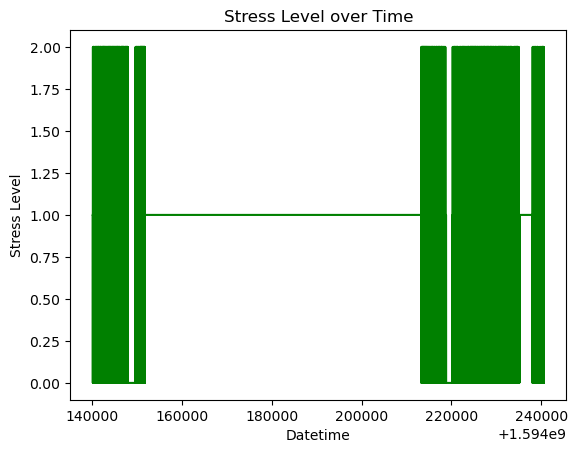

In [6]:
# Create a plot of the stress levels
plt.plot(data["datetime"], data["stress_level"], color="green")
plt.xlabel("Datetime")
plt.ylabel("Stress Level")
plt.title("Stress Level over Time")

# Show the plot
plt.show()

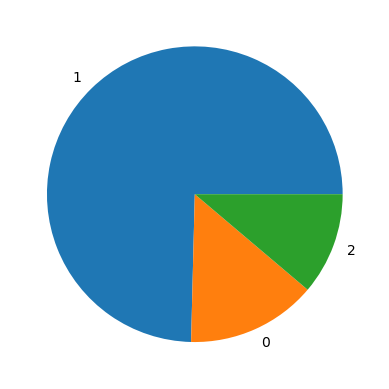

In [8]:
# plot the distribution of labels
import matplotlib.pyplot as plt
plt.pie(data['stress_level'].value_counts(), labels=data['stress_level'].unique())
plt.show()

In [4]:
df_lb = pd.read_csv("C:\\Users\\kdr25\\Downloads\\DS\\labeled_data1.csv")
df_lb.tail(30)

,id,X,Y,z,hr,eda,temp,datetime,stress_level
1048546,15,-57.0,26.0,1.0,79.27,6.720084,31.37,1.594241e+09,1
1048547,15,-59.0,25.0,3.0,79.28,6.679084,31.37,1.594241e+09,1
1048548,15,-61.0,23.0,7.0,79.27,6.585553,31.31,1.594241e+09,1
1048549,15,-60.0,24.0,7.0,79.27,6.449740,31.31,1.594241e+09,1
1048550,15,-60.0,32.0,4.0,79.25,6.443334,31.31,1.594241e+09,1
1048551,15,-60.0,37.0,-3.0,79.20,6.320333,31.31,1.594241e+09,1
1048552,15,-64.0,42.0,-4.0,79.17,6.347239,31.35,1.594241e+09,1
1048553,15,-63.0,38.0,-1.0,79.10,6.357490,31.35,1.594241e+09,1
1048554,15,-63.0,24.0,13.0,78.98,6.336989,31.35,1.594241e+09,1
1048555,15,-68.0,14.0,23.0,78.85,6.369021,31.35,1.594241e+09,1


In [5]:
# Drop the "id" column
df_lb.drop("id", axis=1, inplace=True)


In [6]:
df_lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   X             1048576 non-null  float64
 1   Y             1048576 non-null  float64
 2   z             1048576 non-null  float64
 3   hr            1048576 non-null  float64
 4   eda           1048576 non-null  float64
 5   temp          1048576 non-null  float64
 6   datetime      1048576 non-null  float64
 7   stress_level  1048576 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 64.0 MB


In [7]:
df_lb.head()

,X,Y,z,hr,eda,temp,datetime,stress_level
0,-57.0,7.0,-31.0,83.00,0.000000,30.13,1.594140e+09,1
1,-57.0,7.0,-30.0,83.00,0.032035,30.13,1.594140e+09,1
2,-57.0,7.0,-30.0,83.67,0.060226,30.13,1.594140e+09,1
3,-57.0,7.0,-31.0,87.25,0.067915,30.13,1.594140e+09,1
4,-57.0,7.0,-32.0,81.80,0.073040,30.13,1.594140e+09,1


In [8]:
# check null value
df_lb.isnull().sum()


X               0
Y               0
z               0
hr              0
eda             0
temp            0
datetime        0
stress_level    0
dtype: int64

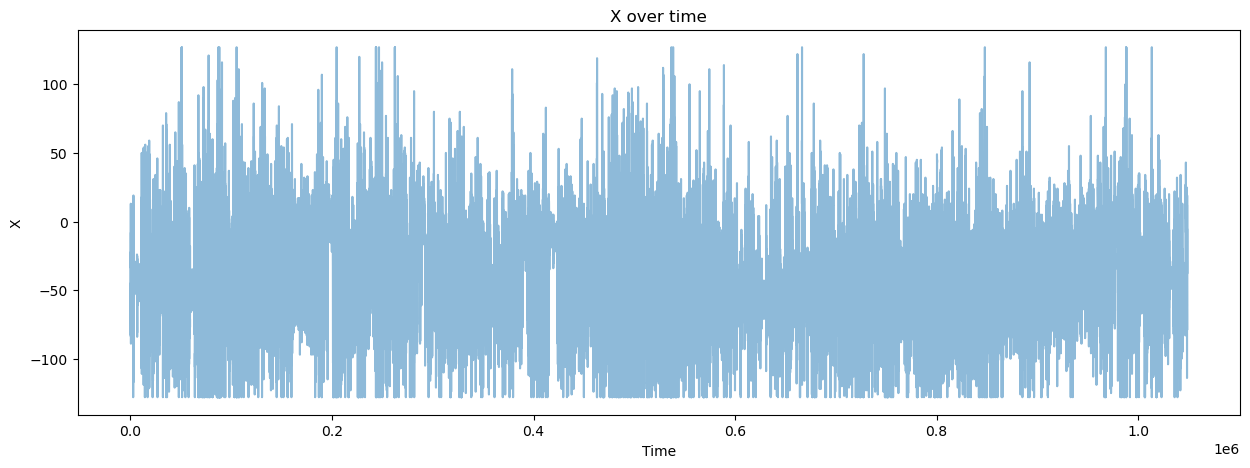

In [9]:
import matplotlib.pyplot as plt

df_lb['X'].plot(figsize=(15,5), alpha=0.5)
plt.title('X over time')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

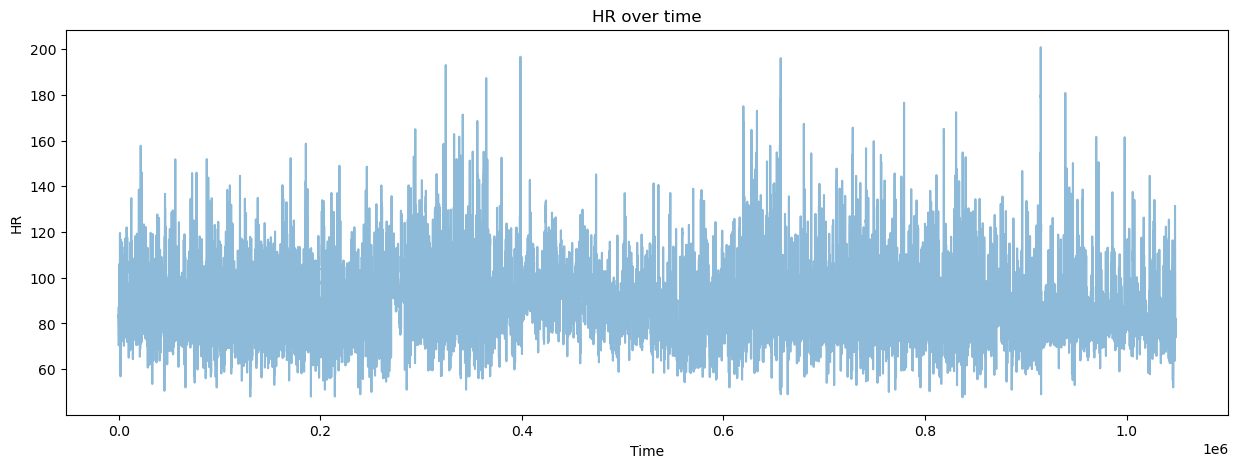

In [10]:
import matplotlib.pyplot as plt

df_lb['hr'].plot(figsize=(15,5), alpha=0.5)
plt.title('HR over time')
plt.xlabel('Time')
plt.ylabel('HR')
plt.show()


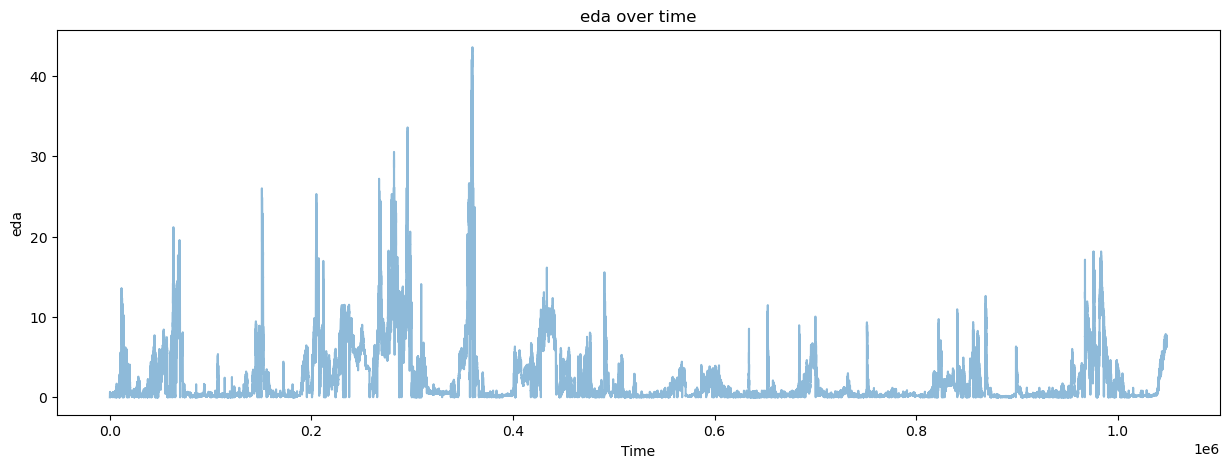

In [11]:
import matplotlib.pyplot as plt

df_lb['eda'].plot(figsize=(15,5), alpha=0.5)
plt.title('eda over time')
plt.xlabel('Time')
plt.ylabel('eda')
plt.show()

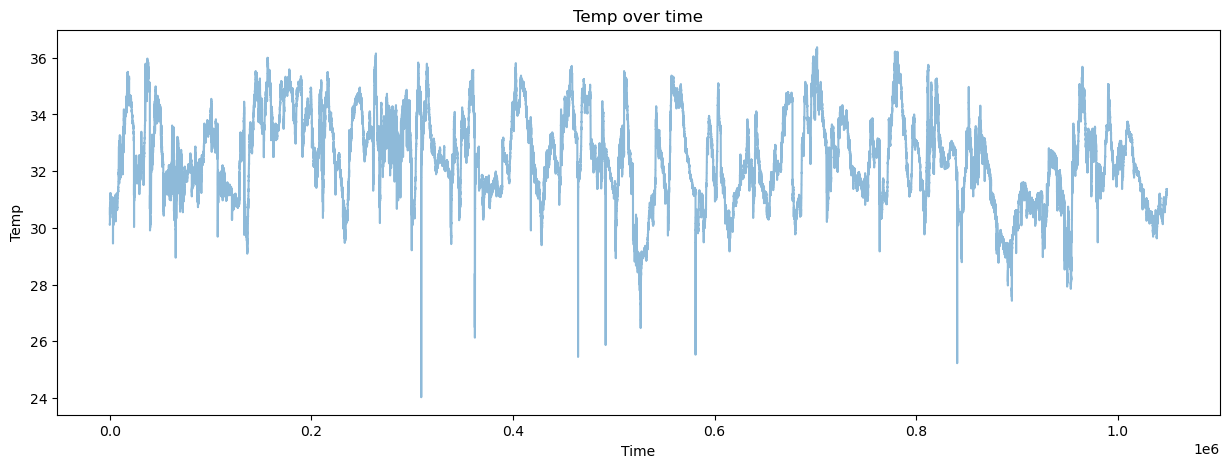

In [12]:
import matplotlib.pyplot as plt

df_lb['temp'].plot(figsize=(15,5), alpha=0.5)
plt.title('Temp over time')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.show()

In [13]:
df_f = df_lb


In [14]:
df_f.tail(30)

,X,Y,z,hr,eda,temp,datetime,stress_level
1048546,-57.0,26.0,1.0,79.27,6.720084,31.37,1.594241e+09,1
1048547,-59.0,25.0,3.0,79.28,6.679084,31.37,1.594241e+09,1
1048548,-61.0,23.0,7.0,79.27,6.585553,31.31,1.594241e+09,1
1048549,-60.0,24.0,7.0,79.27,6.449740,31.31,1.594241e+09,1
1048550,-60.0,32.0,4.0,79.25,6.443334,31.31,1.594241e+09,1
1048551,-60.0,37.0,-3.0,79.20,6.320333,31.31,1.594241e+09,1
1048552,-64.0,42.0,-4.0,79.17,6.347239,31.35,1.594241e+09,1
1048553,-63.0,38.0,-1.0,79.10,6.357490,31.35,1.594241e+09,1
1048554,-63.0,24.0,13.0,78.98,6.336989,31.35,1.594241e+09,1
1048555,-68.0,14.0,23.0,78.85,6.369021,31.35,1.594241e+09,1


In [15]:
df_f.describe()

,X,Y,z,hr,eda,temp,datetime,stress_level
count,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06
mean,-4.085293e+01,3.640305e+00,1.401830e+01,8.819684e+01,2.260833e+00,3.249297e+01,1.594202e+09,1.030397e+00
std,2.271533e+01,3.236880e+01,3.174863e+01,1.405269e+01,3.755429e+00,1.516367e+00,3.763495e+04,5.030760e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,4.770000e+01,0.000000e+00,2.403000e+01,1.594140e+09,0.000000e+00
25%,-5.600000e+01,-1.200000e+01,-9.000000e+00,7.848000e+01,2.062940e-01,3.141000e+01,1.594150e+09,1.000000e+00
50%,-4.500000e+01,5.000000e+00,2.100000e+01,8.575000e+01,5.486770e-01,3.245000e+01,1.594221e+09,1.000000e+00
75%,-3.000000e+01,2.300000e+01,3.900000e+01,9.533000e+01,2.860953e+00,3.359000e+01,1.594229e+09,1.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,2.008500e+02,4.357153e+01,3.637000e+01,1.594241e+09,2.000000e+00


In [16]:
def make_positive(x):
    if x < 0:
        return abs(x)
    else:
        return x

In [17]:
df_f['X'] = df_f['X'].apply(make_positive)
df_f['Y'] = df_f['Y'].apply(make_positive)
df_f['z'] = df_f['z'].apply(make_positive)
df_f['hr'] = df_f['hr'].apply(make_positive)
df_f['eda'] = df_f['eda'].apply(make_positive)
df_f['temp'] = df_f['temp'].apply(make_positive)
df_f['datetime'] = df_f['datetime'].apply(make_positive)

In [18]:
df_f.head(10)

,X,Y,z,hr,eda,temp,datetime,stress_level
0,57.0,7.0,31.0,83.00,0.000000,30.13,1.594140e+09,1
1,57.0,7.0,30.0,83.00,0.032035,30.13,1.594140e+09,1
2,57.0,7.0,30.0,83.67,0.060226,30.13,1.594140e+09,1
3,57.0,7.0,31.0,87.25,0.067915,30.13,1.594140e+09,1
4,57.0,7.0,32.0,81.80,0.073040,30.13,1.594140e+09,1
5,56.0,7.0,31.0,81.17,0.084573,30.13,1.594140e+09,1
6,56.0,7.0,30.0,81.00,0.085854,30.13,1.594140e+09,1
7,57.0,7.0,31.0,80.75,0.093543,30.13,1.594140e+09,1
8,57.0,7.0,31.0,80.44,0.108920,30.11,1.594140e+09,1
9,57.0,7.0,31.0,80.10,0.110201,30.11,1.594140e+09,1


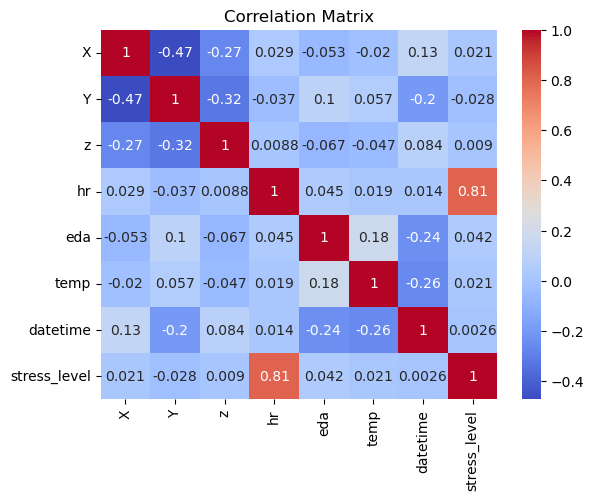

In [19]:
# Creating a correlation matrix
corr_matrix = df_f.corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'eda'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'stress_level'}>, <AxesSubplot:>]],
      dtype=object)

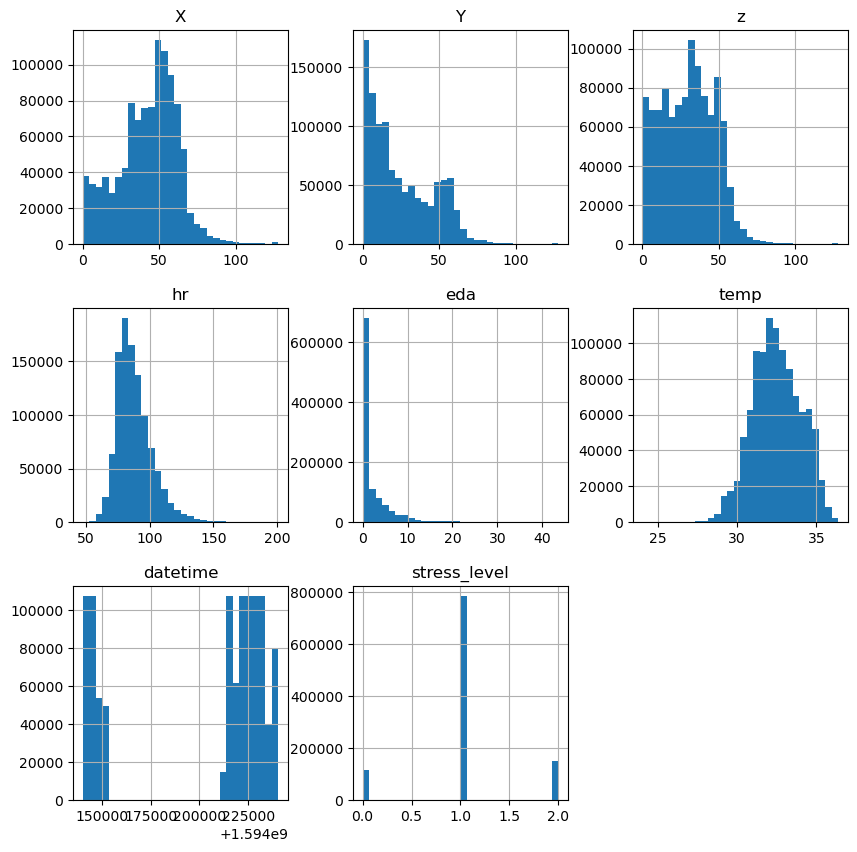

In [20]:
# data visiualaization using histrogram
df_f.hist( bins = 30, figsize=(10,10))

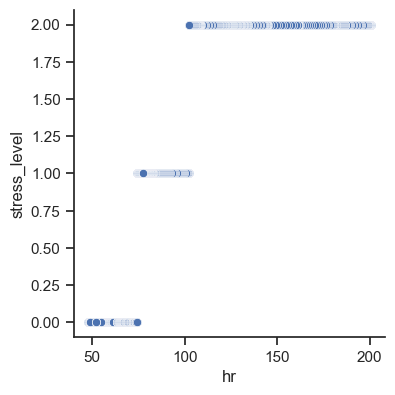

In [21]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_f, x_vars=['hr'], y_vars=['stress_level'], height=4)
plt.show()


In [22]:
df_f.head()

,X,Y,z,hr,eda,temp,datetime,stress_level
0,57.0,7.0,31.0,83.00,0.000000,30.13,1.594140e+09,1
1,57.0,7.0,30.0,83.00,0.032035,30.13,1.594140e+09,1
2,57.0,7.0,30.0,83.67,0.060226,30.13,1.594140e+09,1
3,57.0,7.0,31.0,87.25,0.067915,30.13,1.594140e+09,1
4,57.0,7.0,32.0,81.80,0.073040,30.13,1.594140e+09,1


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_f.drop('stress_level', axis=1), df_f['stress_level'], test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)
score = r2_score(y_test, y_pred)
print('R-squared score:', score)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

[1.60930611 0.92885492 0.80172705 ... 1.01533022 0.92292758 1.08718285]
R-squared score: 0.6507069563173965
Mean squared error: 0.08813078802947862


In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_f.drop('stress_level', axis=1), df_f['stress_level'], test_size=0.2)

# Create the k-nearest neighbors regression model and fit it to the training data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the model to predict stress levels on the testing data
y_pred = knn.predict(X_test)
print(y_pred)

# Calculate the R-squared score and mean squared error of the predictions
score = r2_score(y_test, y_pred)
print('R-squared score:', score)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)



[1.8 1.  1.  ... 1.  2.  0. ]
R-squared score: 0.9097492876267914
Mean squared error: 0.022798260504682522
